In [3]:
#Importar libreria
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#Uso de sklearn modulo
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  train_test_split,cross_val_score

In [9]:
#Cargar el dataset
df=pd.read_csv("data_co2.csv",usecols=['Car','Model','Volume','Weight','CO2'])
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [10]:
#Definir x y y 
x=df[['Weight','Volume']]
y=df['CO2']

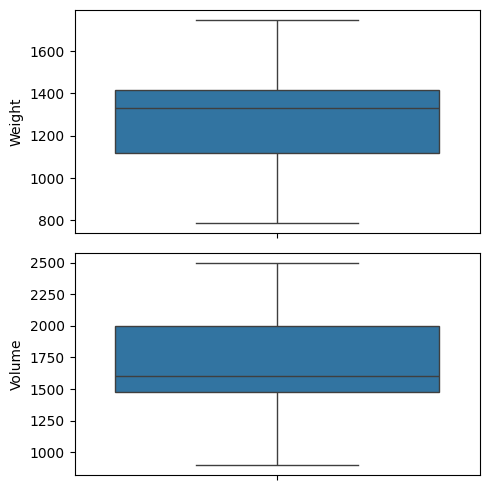

In [15]:
#Checar las salidas
fig, axs = plt.subplots(2, figsize=(5, 5))
plt1 =sns.boxplot(df['Weight'], ax=axs[0])
plt2 =sns.boxplot(df['Volume'], ax=axs[1])
plt.tight_layout()

<Axes: xlabel='CO2', ylabel='Count'>

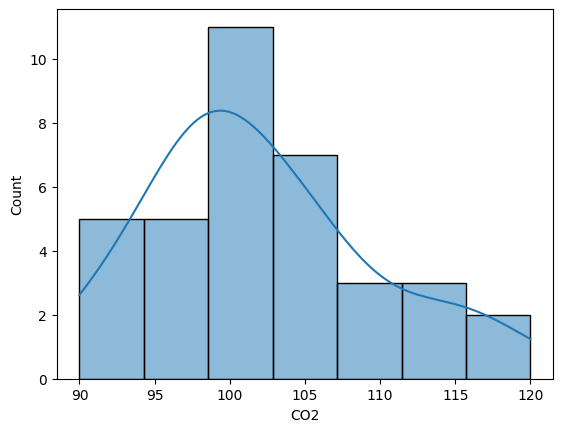

In [ ]:
#Exploracion de los datos para validar una distribucion normal 
sns.histplot(df['CO2'],kde=True)

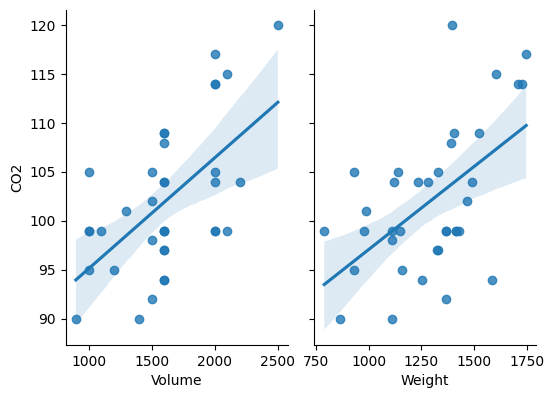

In [20]:
sns.pairplot(df, x_vars=['Volume', 'Weight'], y_vars='CO2', height=4, aspect=0.7, kind='reg')
plt.show()

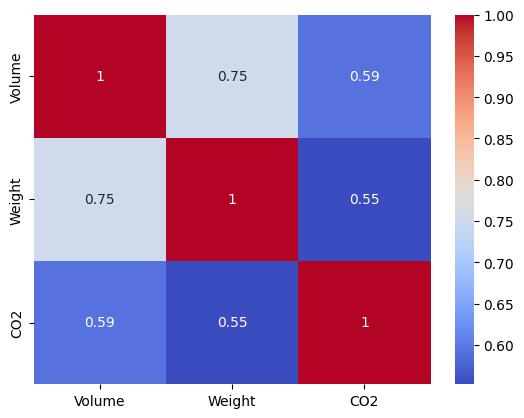

In [21]:
#Mapa de calor
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='coolwarm')
plt.show()

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
y_train.shape

(28,)

In [32]:
y_test.shape

(8,)

In [33]:
#Instanciando la regresion lineal 
reg_model=linear_model.LinearRegression()


In [34]:
#inicia el entrenamiento
reg_model=LinearRegression().fit(x_train, y_train)

In [35]:
#imprimir los coeficientes
print('Coeficientes: ', reg_model.coef_)
print('Intercepto: ', reg_model.intercept_)
list(zip(x, reg_model.coef_))

Coeficientes:  [0.00728963 0.0076251 ]
Intercepto:  80.57109791690918


[('Weight', np.float64(0.007289631369230237)),
 ('Volume', np.float64(0.007625103969204904))]

In [37]:
#Precisión de entrenamiento
y_pred_train=reg_model.predict(x_train)
x_pred_test=reg_model.predict(x_test)
print('Precisión de entrenamiento: ', y_pred_train)
print('Precisión de prueba: ', x_pred_test)

Precisión de entrenamiento:  [ 97.70046813 108.25012734 108.39591997 109.8028936  102.90385187
 103.87337284 101.77395901 100.11482395 101.89788274  94.96826943
 106.6770548  102.43731546 101.95910069 106.6828566   98.17719507
  96.30227197 102.68806383 106.13613424  99.33044466 103.08609266
 100.31893363 100.92836177 106.23089945 105.50193631 101.15434034
 103.01319634  93.73922262  93.95501067]
Precisión de prueba:  [108.54900223 104.31804036 102.72161109 108.2836746  106.53416307
 102.46647399  96.10255102  94.96826943]


In [39]:
#valores actuales y valores de prediccion 
reg_model_diff=pd.DataFrame({'Actual Value': y_test, 'Prediccion Value': x_pred_test})
reg_model_diff.head()

,Actual Value,Prediccion Value
31,117,108.549002
20,94,104.318040
16,99,102.721611
30,115,108.283675
22,99,106.534163


In [40]:
mae=metrics.mean_absolute_error(y_test, x_pred_test)
mse=metrics.mean_squared_error(y_test, x_pred_test)
r2=np.sqrt(metrics.mean_squared_error(y_test, x_pred_test))
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', r2)

Mean Absolute Error: 5.642098903028479
Mean Squared Error: 41.48536307266049
Root Mean Squared Error: 6.440913217289959
